# Pharma Prediction Challenge

### Problem: 
You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

### Set up

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Exploring the Data

In [52]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [53]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

The data has some columns with null values, and although there are a lot of columns with numeric data types, some of them represent categorical data. 

In [54]:
pharma_data.shape

(23097, 18)

In [55]:
pharma_data.isna().sum() / pharma_data.count() * 100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056316
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.649071
B                            5.649071
C                            5.649071
D                            5.649071
E                            5.649071
F                            5.649071
Z                            5.649071
Number_of_prev_cond          5.649071
Survived_1_year              0.000000
dtype: float64

Treated_with_drugs has a very small percentage of null values while the A,B,C,D,E,F,Z columns all are missing 5.65% of values. Therefore, I think it would be better to fill missing values in the Treated_with_drugs column with the mode, and get rid of the missing value rows for the other columns. 

In [56]:
pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0], inplace = True) 
pharma_data = pharma_data.dropna()
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21862 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  21862 non-null  int64  
 1   Diagnosed_Condition        21862 non-null  int64  
 2   Patient_ID                 21862 non-null  int64  
 3   Treated_with_drugs         21862 non-null  object 
 4   Patient_Age                21862 non-null  int64  
 5   Patient_Body_Mass_Index    21862 non-null  float64
 6   Patient_Smoker             21862 non-null  object 
 7   Patient_Rural_Urban        21862 non-null  object 
 8   Patient_mental_condition   21862 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

### Exploratory Data Analysis

<AxesSubplot:xlabel='Survived_1_year', ylabel='Patient_Body_Mass_Index'>

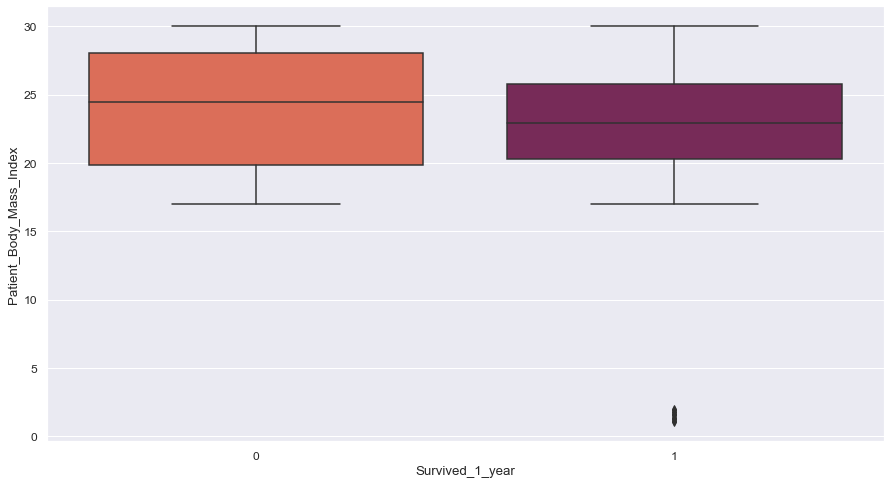

In [57]:
plt.figure(figsize = (15, 8))
sns.set_style("darkgrid")
sns.boxplot(data = pharma_data, x = 'Survived_1_year', y = 'Patient_Body_Mass_Index', palette = 'rocket_r')

<AxesSubplot:xlabel='Survived_1_year', ylabel='count'>

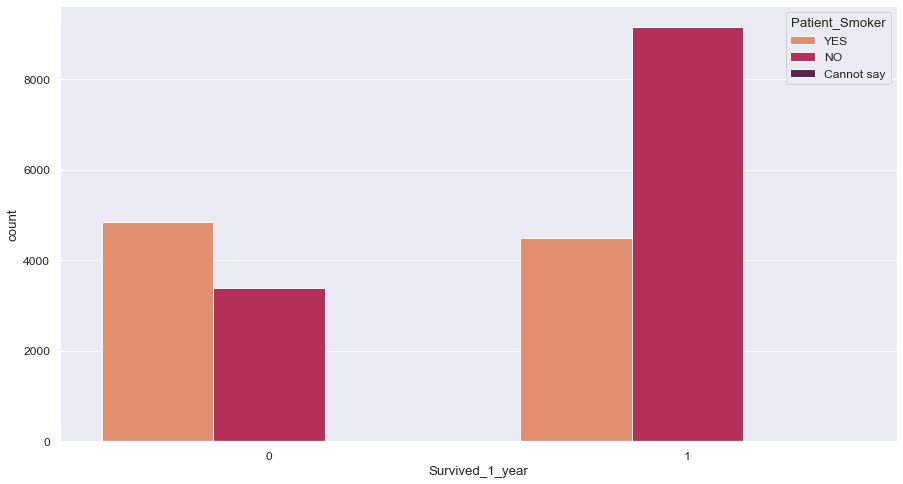

In [58]:
plt.figure(figsize = (15, 8))
sns.countplot(data = pharma_data, x = 'Survived_1_year', hue = 'Patient_Smoker', palette = 'rocket_r')

<AxesSubplot:xlabel='Survived_1_year', ylabel='count'>

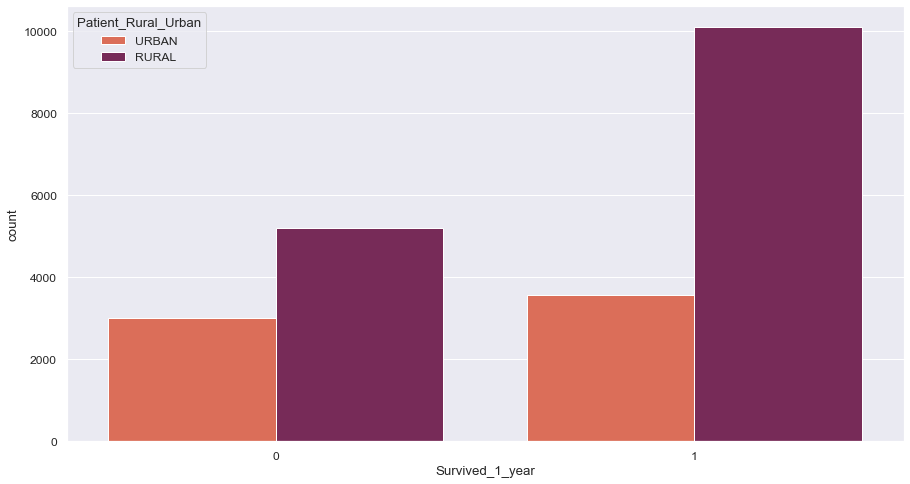

In [59]:
plt.figure(figsize = (15, 8))
sns.countplot(data = pharma_data, x = 'Survived_1_year', hue = 'Patient_Rural_Urban', palette = 'rocket_r')

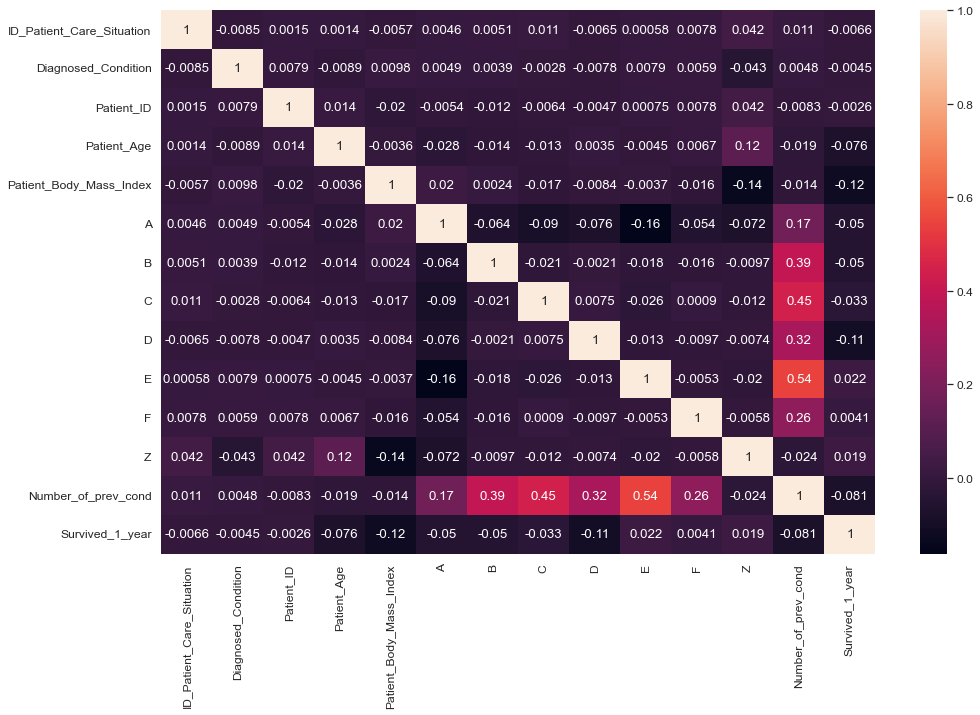

In [60]:
plt.figure(figsize = (16,10))
sns.set(font_scale = 1.1)
sns.heatmap(pharma_data.corr(),annot = True)
plt.show()

Not a lot of useful info from the graphs themselves, and although the correlation matrix shows som promising hot spots, this is not that reliable because most of the data is not numerical. 

## Building the Model

### Making All The Columns into Numerical Types

In [61]:
pharma_data_dummy = pd.get_dummies(pharma_data)

In [62]:
pharma_data_dummy.drop('Patient_ID', axis = 1,  inplace = True)
pharma_data_dummy.drop('Patient_mental_condition_Stable', axis = 1, inplace = True)
pharma_data_dummy.drop('Patient_Smoker_Cannot say', axis = 1, inplace = True)

In [63]:
pharma_data_dummy.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1,18164,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,6283,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,5339,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,33012,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0


In [64]:
pharma_data_dummy.shape

(21862, 49)

### Splitting the Data

In [65]:
x = pharma_data_dummy.drop('Survived_1_year', axis = 1)
y = pharma_data_dummy['Survived_1_year']

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 331)

### Using XGBoost for Feature Importance and Classification Model Training

In [66]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [67]:
xgb_model = XGBClassifier(random_state = 0)
xgb_model.fit(xTrain, yTrain)

[18:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Feature Importances :  [0.00845977 0.02643002 0.01962602 0.02457244 0.03755526 0.01910385
 0.03718803 0.04445858 0.00654757 0.00907694 0.         0.01348508
 0.01821806 0.02667428 0.01704113 0.         0.         0.
 0.00752405 0.0041845  0.00793193 0.0104255  0.0051954  0.
 0.01191043 0.009358   0.00684379 0.02236589 0.00966238 0.01205292
 0.00604973 0.         0.0111838  0.0144815  0.00505548 0.01298586
 0.01526963 0.01085117 0.01068927 0.01444333 0.03582126 0.01470028
 0.01971073 0.18674085 0.10473339 0.07920399 0.04218788 0.        ]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

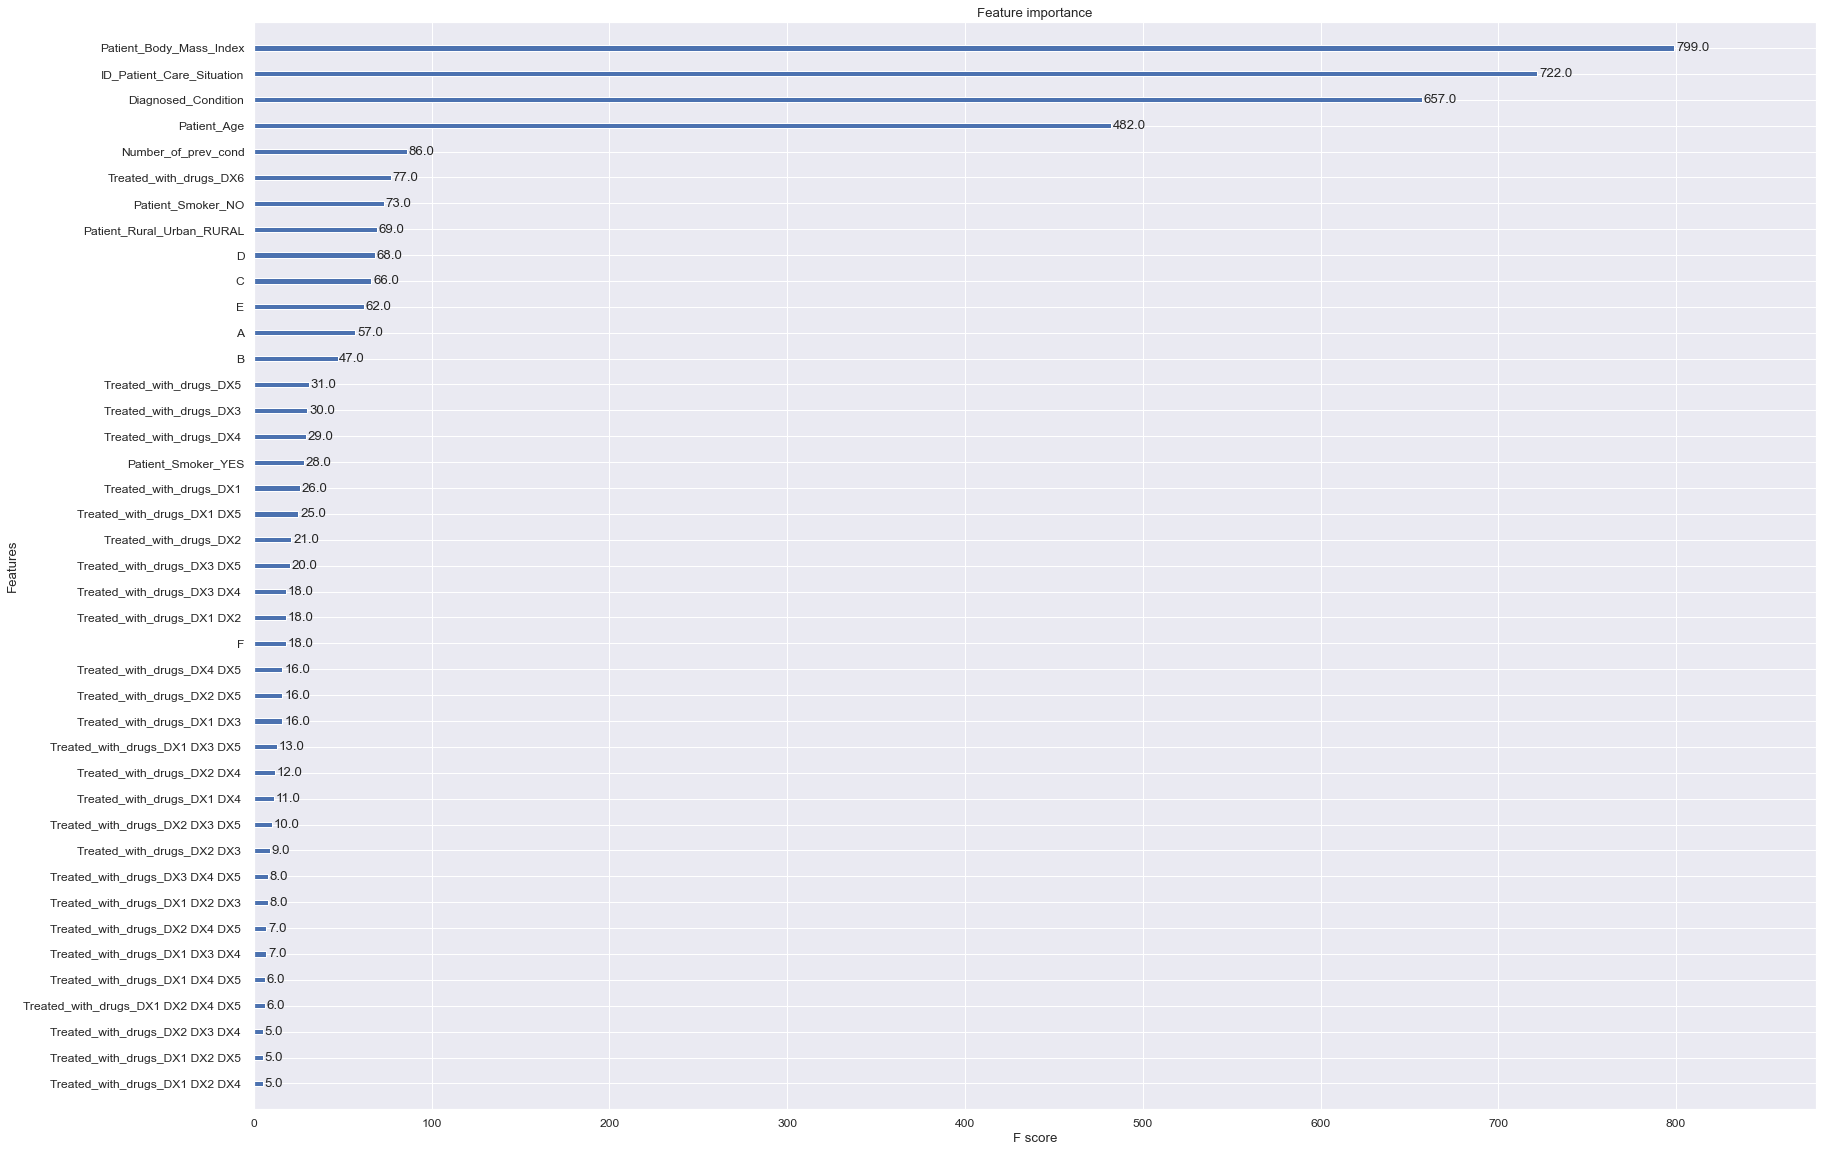

In [68]:
print("Feature Importances : ", xgb_model.feature_importances_)

plt.rcParams["figure.figsize"] = (28, 20)
plot_importance(xgb_model)

In [69]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = xgb_model.predict(xTest)

xgb_ac = accuracy_score(yTest, y_pred)
xgb_fscore = f1_score(yTest ,y_pred)

print("Model Accuracy:", xgb_ac)
print("Model F1 Score:", xgb_fscore)

Model Accuracy: 0.8365604512883061
Model F1 Score: 0.8705314009661835


Pretty good F1 score.

## Hyperameter Optimization using GridSearchCV

In [70]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [71]:
from sklearn.model_selection import GridSearchCV

xgb_cl = XGBClassifier(objective="binary:logistic")

grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs = -1, cv = 3, scoring = "roc_auc")

_ = grid_cv.fit(x, y)

[18:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
grid_cv.best_score_

0.9180128513027923

In [73]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [74]:
final_cl = XGBClassifier(
    **grid_cv.best_params_,
    objective = "binary:logistic"
)

## Prediction on the Final Test Data

In [75]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [76]:
test_data = pd.get_dummies(test_data)

In [77]:
test_data.drop('Patient_ID', axis = 1,  inplace = True)
test_data.drop('Patient_mental_condition_Stable', axis = 1, inplace = True)

In [78]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,19150,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,23216,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2,11890,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,1,0,1,0
3,7149,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,0,1
4,22845,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [79]:
test_data.shape

(9303, 48)

In [83]:
_ = final_cl.fit(xTrain, yTrain)

[18:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
test_prediction = final_cl.predict(test_data)

In [90]:
res = pd.DataFrame(test_prediction)
res.index = test_data.index
res.columns = ["prediction"]
res.to_csv('pharma_data_prediction_final.csv') 